# remove and replace outliers

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('registros_limpios_estaciones_conColumnasNombres.csv', sep=';', parse_dates=True)

In [60]:
data.head()

,auto_id,id_csv,id,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,...,createdDateTime,pm2_5_aqi,pm10_aqi,so2_aqi,o3_aqi,co_aqi,no2_aqi,aqi,primary_pollutant,customer_tz_createdDateTime
0,69001,3,262484,4417935af3905f62,36.29,51,983,5,5,6,...,7/8/2022 01:15,21,6,0,0,0,0,21,pm2_5,6/8/2022 20:15
1,69002,4,262471,4417935af3905f62,36.30,50,983,3,4,5,...,7/8/2022 01:08,17,5,0,0,0,0,17,pm2_5,6/8/2022 20:08
2,69003,5,262461,4417935af3905f62,36.72,50,984,5,4,5,...,7/8/2022 01:02,17,5,0,0,0,0,17,pm2_5,6/8/2022 20:02
3,69004,6,262453,4417935af3905f62,36.89,49,985,1,4,5,...,7/8/2022 00:59,17,5,0,0,0,0,17,pm2_5,6/8/2022 19:59
4,69005,7,262444,4417935af3905f62,37.54,48,988,4,5,5,...,7/8/2022 00:55,21,5,0,0,0,0,21,pm2_5,6/8/2022 19:55


In [61]:
len(data)

646105

In [62]:
data = data.drop(columns=['id_csv'])

In [63]:
data.head()

,auto_id,id,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,...,createdDateTime,pm2_5_aqi,pm10_aqi,so2_aqi,o3_aqi,co_aqi,no2_aqi,aqi,primary_pollutant,customer_tz_createdDateTime
0,69001,262484,4417935af3905f62,36.29,51,983,5,5,6,0,...,7/8/2022 01:15,21,6,0,0,0,0,21,pm2_5,6/8/2022 20:15
1,69002,262471,4417935af3905f62,36.30,50,983,3,4,5,0,...,7/8/2022 01:08,17,5,0,0,0,0,17,pm2_5,6/8/2022 20:08
2,69003,262461,4417935af3905f62,36.72,50,984,5,4,5,0,...,7/8/2022 01:02,17,5,0,0,0,0,17,pm2_5,6/8/2022 20:02
3,69004,262453,4417935af3905f62,36.89,49,985,1,4,5,0,...,7/8/2022 00:59,17,5,0,0,0,0,17,pm2_5,6/8/2022 19:59
4,69005,262444,4417935af3905f62,37.54,48,988,4,5,5,0,...,7/8/2022 00:55,21,5,0,0,0,0,21,pm2_5,6/8/2022 19:55


In [64]:
#4417935af3d82f50-Dunas |==| 44179354c798205a-La Manga |==| 4417935aff00388d-Palma Dorada |==| 4417935af40cae86-Camino Nuevo La Choya
#4417935b01081c59-Cuauhtemoc
query_id = '4417935aff00388d'#palma dorada
query_id2= '4417935af3d82f50'#dunas
#query_id3= '4417935b01081c59'#Cuauhtemoc
#data = data.query("devEui == @query_id or devEui == @query_id2 or devEui == @query_id3")
data = data.query("devEui == @query_id or devEui == @query_id2")
len(data)

127652

In [65]:
data = data[['devEui', 'temperature', 'humidity', 'pressure', 'pm1_0', 'pm2_5', 'pm10', 'so2', 'o3', 'co', 'customer_tz_createdDateTime']]


In [66]:
data['customer_tz_createdDateTime'] = pd.to_datetime(data['customer_tz_createdDateTime'], format='mixed')

In [67]:
datatypes = data.dtypes
datatypes

devEui                                 object
temperature                           float64
humidity                                int64
pressure                                int64
pm1_0                                   int64
pm2_5                                   int64
pm10                                    int64
so2                                     int64
o3                                    float64
co                                      int64
customer_tz_createdDateTime    datetime64[ns]
dtype: object

In [68]:
data.head()

,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime
22647,4417935af3d82f50,22.66,92,982,1,2,2,0,0.01,0,2022-01-09 00:02:00
22648,4417935af3d82f50,22.84,93,982,3,3,4,0,0.01,0,2022-01-09 00:08:00
22649,4417935af3d82f50,22.91,92,982,2,3,3,0,0.01,0,2022-01-09 00:12:00
22650,4417935af3d82f50,23.00,92,981,1,2,2,0,0.04,0,2022-01-09 00:17:00
22651,4417935af3d82f50,23.14,93,981,2,3,3,0,0.01,0,2022-01-09 00:25:00


In [69]:
data['diaSemana'] = data['customer_tz_createdDateTime'].dt.dayofweek
data['diaMes'] = data['customer_tz_createdDateTime'].dt.day
data['hora'] = data['customer_tz_createdDateTime'].dt.hour

In [70]:
data1 = data.query("devEui == @query_id")
data2 = data.query("devEui == @query_id2")

<Axes: xlabel='pm2_5'>

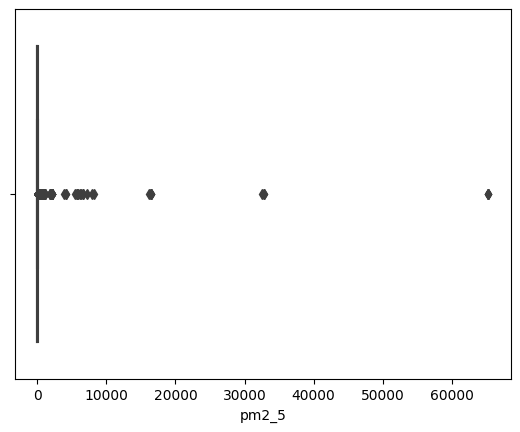

In [71]:
sns.boxplot(x=data1['pm2_5'])

In [72]:
#scatter = sns.scatterplot(x='customer_tz_createdDateTime',y='pm2_5',data=data2, palette='bright')
#scatter.set_title('4417935af3d82f50 dunas')

# Removiendo outliers

## Z-score method

In [73]:
#find limits
upper_limit = data1['pm2_5'].mean() + 3*data['pm2_5'].std()
lower_limit = data1['pm2_5'].mean() - 3*data['pm2_5'].std()

print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  1567.6616235728513
lower limit:  -1507.379300300726


parece que este metodo no funcionara para mi caso porque los outliers son tan altos que disturban la media

In [74]:
#find outliers
data1.loc[(data1['pm2_5'] >= upper_limit) | (data1['pm2_5'] <= lower_limit)]

,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74819,4417935aff00388d,24.19,83,941,0,16385,1,0,0.01,0,2022-02-09 06:33:00,2,9,6
76915,4417935aff00388d,33.09,55,985,2,2050,3,0,0.01,0,2022-09-09 16:51:00,4,9,16
76956,4417935aff00388d,28.12,69,956,3,3843,4,0,0.01,0,2022-09-09 20:36:00,4,9,20
77473,4417935aff00388d,36.34,46,988,3,32514,4,0,0.01,0,2022-11-09 16:11:00,2,9,16
138944,4417935aff00388d,40.44,35,996,7,65287,9,0,0.01,0,2022-07-15 19:14:00,4,15,19
139512,4417935aff00388d,34.58,47,978,10,2054,10,0,0.01,0,2022-07-17 21:24:00,6,17,21
140037,4417935aff00388d,33.53,50,973,20,2056,12,0,0.02,0,2022-07-19 21:02:00,1,19,21
140421,4417935aff00388d,41.53,27,999,6,7148,5,0,0.01,0,2022-07-21 20:01:00,3,21,20
140458,4417935aff00388d,36.34,34,979,6,32772,4,0,0.01,0,2022-07-21 23:12:00,3,21,23
140780,4417935aff00388d,33.14,50,968,4,2051,4,0,0.01,0,2022-07-23 02:46:00,5,23,2


In [75]:
# trimming - delete the outliers
new_data = data1.loc[(data1['pm2_5'] <= upper_limit) & (data1['pm2_5'] >= lower_limit)]
print('old data: ', len(data1))
print('new data: ', len(new_data))
print('diff: ', len(data1) -len(new_data))
new_data

old data:  63445
new data:  63405
diff:  40


,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74454,4417935aff00388d,22.43,95,929,3,4,5,0,0.01,0,2022-01-09 00:01:00,6,9,0
74455,4417935aff00388d,22.48,94,930,8,7,6,0,0.01,0,2022-01-09 00:04:00,6,9,0
74456,4417935aff00388d,22.53,94,931,27,28,36,0,0.01,0,2022-01-09 00:10:00,6,9,0
74457,4417935aff00388d,22.64,95,932,6,6,8,0,0.01,0,2022-01-09 00:17:00,6,9,0
74458,4417935aff00388d,22.73,95,932,8,9,11,0,0.01,0,2022-01-09 00:20:00,6,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646058,4417935aff00388d,39.89,36,979,30,22,39,0,0.01,0,2023-08-17 17:05:00,3,17,17
646068,4417935aff00388d,39.78,36,979,50,44,66,0,0.03,0,2023-08-17 17:15:00,3,17,17
646078,4417935aff00388d,39.36,37,977,5,6,7,0,0.03,0,2023-08-17 17:25:00,3,17,17
646088,4417935aff00388d,39.14,37,977,8,8,11,0,0.03,0,2023-08-17 17:35:00,3,17,17


In [76]:
#capping the data ceiling
new_data = data1.copy()
new_data.loc[(new_data['pm2_5'] >= upper_limit), 'pm2_5'] = upper_limit
new_data.loc[(new_data['pm2_5'] <= lower_limit), 'pm2_5'] = lower_limit

<Axes: xlabel='pm2_5'>

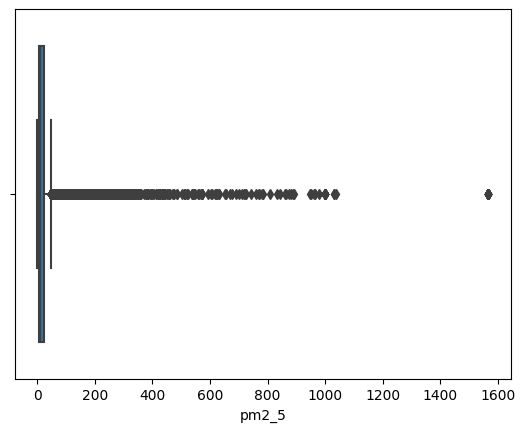

In [77]:
sns.boxplot(x=new_data['pm2_5'])

# IQR method


In [78]:
q1 = data1['pm2_5'].quantile(0.25)
q3 = data1['pm2_5'].quantile(0.75)
iqr = q3- q1
q1, q3, iqr

(5.0, 22.0, 17.0)

In [79]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-20.5, 47.5)

In [80]:
#find outliers
data1.loc[(data1['pm2_5'] >= upper_limit) | (data1['pm2_5'] <= lower_limit)]

,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74819,4417935aff00388d,24.19,83,941,0,16385,1,0,0.01,0,2022-02-09 06:33:00,2,9,6
74893,4417935aff00388d,34.16,54,986,196,140,255,0,0.01,0,2022-02-09 14:33:00,2,9,14
75064,4417935aff00388d,23.75,91,951,108,124,141,0,0.01,0,2022-03-09 05:36:00,2,9,5
75065,4417935aff00388d,26.21,91,951,176,191,230,0,0.01,0,2022-03-09 05:43:00,2,9,5
75066,4417935aff00388d,26.16,91,952,168,188,219,0,0.01,0,2022-03-09 05:47:00,2,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645461,4417935aff00388d,33.96,54,982,96,86,126,0,0.01,0,2023-08-17 06:55:00,3,17,6
645501,4417935aff00388d,37.97,43,1011,100,81,131,0,0.01,0,2023-08-17 07:35:00,3,17,7
645550,4417935aff00388d,39.51,37,1014,123,105,160,0,0.01,0,2023-08-17 08:37:00,3,17,8
645668,4417935aff00388d,43.46,29,1022,120,94,157,0,0.01,0,2023-08-17 10:39:00,3,17,10


In [81]:
# trimming - delete the outliers
new_data = data1.loc[(data1['pm2_5'] <= upper_limit) & (data1['pm2_5'] >= lower_limit)]
print('old data: ', len(data1))
print('new data: ', len(new_data))
print('diff: ', len(data1) -len(new_data))
new_data

old data:  63445
new data:  56873
diff:  6572


,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74454,4417935aff00388d,22.43,95,929,3,4,5,0,0.01,0,2022-01-09 00:01:00,6,9,0
74455,4417935aff00388d,22.48,94,930,8,7,6,0,0.01,0,2022-01-09 00:04:00,6,9,0
74456,4417935aff00388d,22.53,94,931,27,28,36,0,0.01,0,2022-01-09 00:10:00,6,9,0
74457,4417935aff00388d,22.64,95,932,6,6,8,0,0.01,0,2022-01-09 00:17:00,6,9,0
74458,4417935aff00388d,22.73,95,932,8,9,11,0,0.01,0,2022-01-09 00:20:00,6,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646058,4417935aff00388d,39.89,36,979,30,22,39,0,0.01,0,2023-08-17 17:05:00,3,17,17
646068,4417935aff00388d,39.78,36,979,50,44,66,0,0.03,0,2023-08-17 17:15:00,3,17,17
646078,4417935aff00388d,39.36,37,977,5,6,7,0,0.03,0,2023-08-17 17:25:00,3,17,17
646088,4417935aff00388d,39.14,37,977,8,8,11,0,0.03,0,2023-08-17 17:35:00,3,17,17


<Axes: xlabel='pm2_5'>

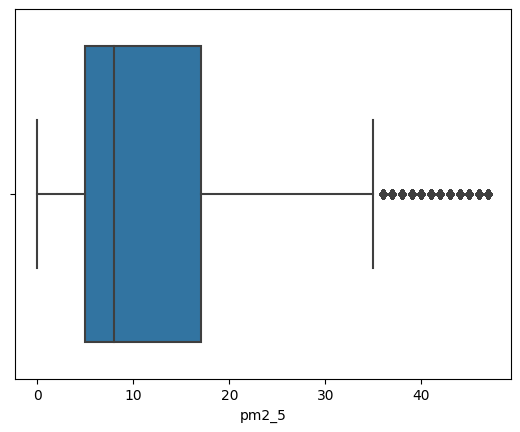

In [82]:
sns.boxplot(x=new_data['pm2_5'])

In [83]:
#capping the data ceiling
new_data = data1.copy()
new_data.loc[(new_data['pm2_5'] >= upper_limit), 'pm2_5'] = upper_limit
new_data.loc[(new_data['pm2_5'] <= lower_limit), 'pm2_5'] = lower_limit

<Axes: xlabel='pm2_5'>

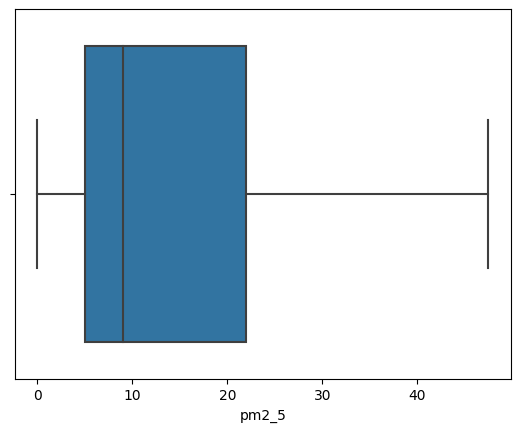

In [84]:
sns.boxplot(x=new_data['pm2_5'])

# Percentile method

In [85]:
upper_limit = data1['pm2_5'].quantile(0.99)
lower_limit = data1['pm2_5'].quantile(0.005)
upper_limit, lower_limit

(170.0, 0.0)

In [86]:
#find outliers
data1.loc[(data1['pm2_5'] >= upper_limit) | (data1['pm2_5'] <= lower_limit)]

,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74488,4417935aff00388d,23.69,89,938,0,0,0,0,0.01,0,2022-01-09 02:52:00,6,9,2
74525,4417935aff00388d,24.12,84,940,0,0,0,0,0.01,0,2022-01-09 05:50:00,6,9,5
74527,4417935aff00388d,23.80,85,940,0,0,0,0,0.01,0,2022-01-09 06:02:00,6,9,6
74571,4417935aff00388d,29.55,71,985,0,0,0,0,0.01,0,2022-01-09 09:29:00,6,9,9
74580,4417935aff00388d,32.43,60,1007,0,0,0,0,0.01,0,2022-01-09 10:20:00,6,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640841,4417935aff00388d,27.91,57,944,292,301,380,0,0.01,0,2023-08-14 01:56:00,0,14,1
640851,4417935aff00388d,27.71,58,944,764,782,994,0,0.01,0,2023-08-14 02:06:00,0,14,2
641751,4417935aff00388d,43.62,23,996,0,0,1,0,0.01,0,2023-08-14 17:09:00,0,14,17
643571,4417935aff00388d,34.54,38,963,193,214,252,0,0.01,0,2023-08-15 23:25:00,1,15,23


In [87]:
# trimming - delete the outliers
new_data = data1.loc[(data1['pm2_5'] <= upper_limit) & (data1['pm2_5'] >= lower_limit)]
print('old data: ', len(data1))
print('new data: ', len(new_data))
print('diff: ', len(data1) -len(new_data))
new_data

old data:  63445
new data:  62816
diff:  629


,devEui,temperature,humidity,pressure,pm1_0,pm2_5,pm10,so2,o3,co,customer_tz_createdDateTime,diaSemana,diaMes,hora
74454,4417935aff00388d,22.43,95,929,3,4,5,0,0.01,0,2022-01-09 00:01:00,6,9,0
74455,4417935aff00388d,22.48,94,930,8,7,6,0,0.01,0,2022-01-09 00:04:00,6,9,0
74456,4417935aff00388d,22.53,94,931,27,28,36,0,0.01,0,2022-01-09 00:10:00,6,9,0
74457,4417935aff00388d,22.64,95,932,6,6,8,0,0.01,0,2022-01-09 00:17:00,6,9,0
74458,4417935aff00388d,22.73,95,932,8,9,11,0,0.01,0,2022-01-09 00:20:00,6,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646058,4417935aff00388d,39.89,36,979,30,22,39,0,0.01,0,2023-08-17 17:05:00,3,17,17
646068,4417935aff00388d,39.78,36,979,50,44,66,0,0.03,0,2023-08-17 17:15:00,3,17,17
646078,4417935aff00388d,39.36,37,977,5,6,7,0,0.03,0,2023-08-17 17:25:00,3,17,17
646088,4417935aff00388d,39.14,37,977,8,8,11,0,0.03,0,2023-08-17 17:35:00,3,17,17


<Axes: xlabel='pm2_5'>

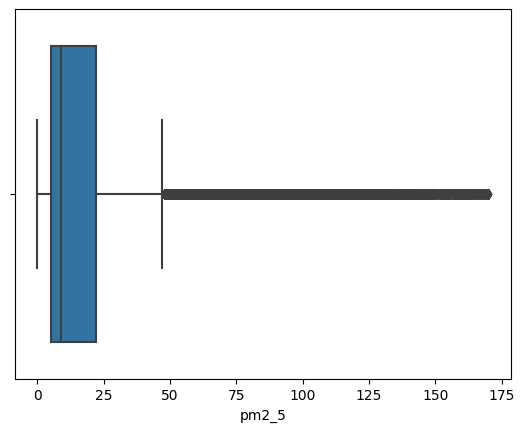

In [88]:
sns.boxplot(x=new_data['pm2_5'])

In [89]:
#capping the data ceiling
new_data = data1.copy()
new_data.loc[(new_data['pm2_5'] >= upper_limit), 'pm2_5'] = upper_limit
new_data.loc[(new_data['pm2_5'] <= lower_limit), 'pm2_5'] = lower_limit

<Axes: xlabel='pm2_5'>

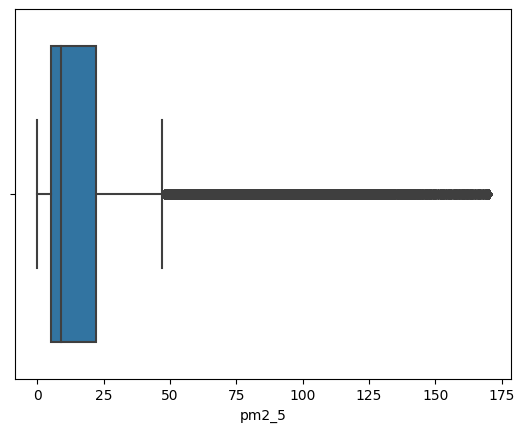

In [90]:
sns.boxplot(x=new_data['pm2_5'])